In [40]:
import os
print(os.getcwd())
import pandas as pd
import sys
import numpy as np
import datetime as dt
import os
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("../../analyzer/getData")
import configparser
config = configparser.ConfigParser()
config.read('../../config.properties')
directorio=config.get('ARCHIVOS', 'archivos_h5s_precios')
print(directorio)
import bdStocks
bd= bdStocks.getData()
sectores=None
fechaI="2006-12-01"
fechaF="2022-06-01"
periodoIndice="M"
fechaI=dt.datetime.strptime(fechaI, '%Y-%m-%d')
fechaF=dt.datetime.strptime(fechaF, '%Y-%m-%d')
files=os.listdir(directorio)
h5s= pd.HDFStore(directorio+files[0], "r")
precios=h5s["data"]
ex=files[0].split("_")[-1].split(".")[0]
precios["exchange"]=ex
exchanges=[ex]
time_range = pd.date_range(fechaI, fechaF,freq=periodoIndice,normalize=True)
time_range=[e.replace(day=1) for e in time_range]
for file in files[1:]:
    h5s=pd.HDFStore(directorio+file, "r")
    dat_aux=h5s["data"]
    ex=file.split("_")[-1].split(".")[0]
    dat_aux["exchange"]=ex
    precios=pd.concat([precios,dat_aux])
    exchanges.append(ex)
precios.set_index("exchange",inplace=True,append=True)
sectores=bd.getSectors()

/home/manuel/Documentos/marketAnanlyzer/analyzer/notebooks
/media/manuel/TRANSCEND/dataBolsa/h5s/


In [82]:
sectores=bd.getSectors()
nombres=bd.executeQuery("select exchange,code,name from stocks")
descriptions=bd.executeQuery("select exchange,stock,description from descriptions")

In [83]:
nombres={e[0]+"_"+e[1]:e[2] for e in nombres}
descriptions={e[0]+"_"+e[1]:e[2] for e in descriptions}
descriptions

{'US_A': "Agilent Technologies, Inc. provides application focused solutions to the life sciences, diagnostics, and applied chemical markets worldwide. The Life Sciences and Applied Markets segment offers liquid and gas chromatography systems and components; liquid and gas chromatography mass spectrometry systems; inductively coupled plasma mass and optical emission spectrometry instruments; atomic absorption instruments; microwave plasma-atomic emission spectrometry instruments; raman spectroscopy; cell analysis plate based assays; flow cytometer; real-time cell analyzer; cell imaging systems; microplate readers; laboratory software, information management, and analytics; laboratory automation and robotic systems; dissolution testing; vacuum pumps; and measurement technologies. The Diagnostics and Genomics segment provides arrays for DNA mutation detection, genotyping, gene copy number determination, identification of gene rearrangements, DNA methylation profiling, and gene expression 

In [41]:
datos=bd.executeQueryDataFrame("select * from ratios_results where report_date is not null order by report_date asc",None)
datos["fecha"]=pd.to_datetime(datos["fecha"])
datos["report_date"]=pd.to_datetime(datos["report_date"])
datos=datos.loc[datos.exchange.isin(exchanges)]
datos["ex"]=datos.apply(lambda x:x["exchange"]+"_"+x["stock"],axis=1)
datos.set_index(["fecha","exchange","stock"],inplace=True)
exchanges=np.unique(datos.index.get_level_values("exchange"))


In [42]:
stocksAdmiral=bd.executeQueryDataFrame("select exchange,code as stock from admiralmarkets",None)
stocksDegiro=bd.executeQueryDataFrame("select exchange,code as stock from degiro",None)
stocksDegiro["exchange"]=stocksDegiro.exchange.transform(lambda x: x if x!="NYSE" and x!="NASDAQ" else "US")
stocksAdmiral["exchange"]=stocksAdmiral.exchange.transform(lambda x: x if x!="NYSE" and x!="NASDAQ" else "US")
stocksDegiro["ex"]=stocksDegiro.apply(lambda x:x["exchange"]+"_"+x["stock"],axis=1)
stocksAdmiral["ex"]=stocksAdmiral.apply(lambda x:x["exchange"]+"_"+x["stock"],axis=1)
np.unique(stocksDegiro.exchange)

array(['AS', 'BE', 'BR', 'CO', 'DU', 'F', 'HA', 'HE', 'HM', 'IC', 'IR',
       'LS', 'LSE', 'MC', 'MI', 'MU', 'NEO', 'NYSE ARCA', 'NYSE MKT',
       'OL', 'OTCCE', 'OTCGREY', 'OTCMKTS', 'OTCQB', 'OTCQX', 'PA',
       'PINK', 'ST', 'STU', 'SW', 'TO', 'US', 'V', 'VI', 'VX', 'XETRA'],
      dtype=object)

In [43]:
fechas=iter(time_range[:-1])
fechasSig=iter(time_range[1:])

In [44]:
beneficio=0
capitalInicial=4000

In [45]:
fecha=next(fechas)
fechaSig=next(fechasSig)
fecha,fechaSig

(Timestamp('2006-12-01 00:00:00', freq='M'),
 Timestamp('2007-01-01 00:00:00', freq='M'))

(132, 21) (183, 21)


<AxesSubplot:xlabel='exchange', ylabel='report_date'>

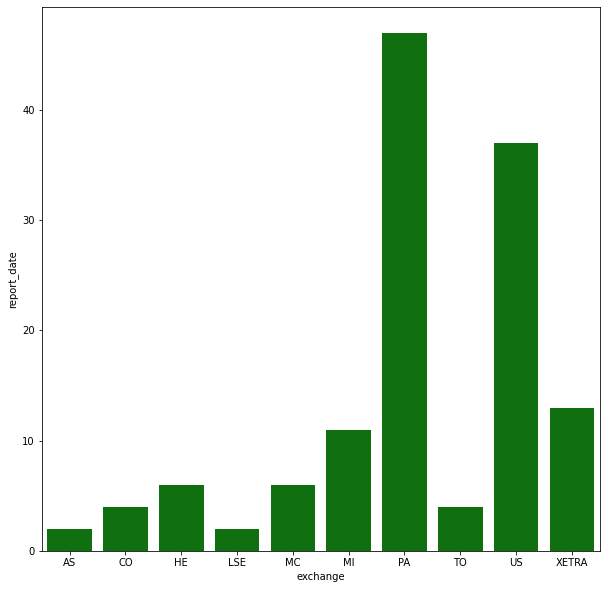

In [46]:
data=datos.loc[(datos.report_date.dt.month==fecha.month)& (datos.report_date.dt.year==fecha.year)]
indice1=data.loc[(data.per>0)&(data.per<30)]
indice=indice1.loc[indice1.ex.isin(stocksDegiro.ex)]
print(indice.shape,indice1.shape)
cuenta=indice.groupby(level="exchange").count()
cuenta
plt.figure(figsize=(10,10))
sns.barplot(x=cuenta.index,y=cuenta.report_date,color="green")

In [47]:
exchanges_aux=iter(exchanges)

In [48]:
indice

netIncome   totalAssets     totalLiab  \
fecha      exchange stock                                             
2006-09-01 US       ASX    1.314134e+08  1.001662e+11  5.300579e+10   
                    EMKR   2.054267e+07  2.339052e+08  1.336485e+08   
                    EIG    4.964851e+07  3.153152e+09  2.924296e+09   
                    ORAN   2.957151e+09  1.038719e+11  7.771211e+10   
                    TX     2.421668e+08  8.504415e+09  5.128298e+09   
...                                 ...           ...           ...   
2006-12-01 XETRA    IBM    2.586790e+09  1.034751e+11  7.206666e+10   
                    GEC    5.397655e+09  6.856882e+11  5.666377e+11   
                    CAT1   8.400035e+08  4.914464e+10  4.112108e+10   
                    ADM    3.829443e+08  2.226948e+10  1.234568e+10   
                    PFE    5.117022e+09  1.129478e+11  4.361972e+10   

                           totalCurrentLiabilities  totalStockholderEquity  \
fecha      exchange stock                                                    
2006-09-01 US       ASX               2.255551e+10            1.686560e+09   
                    EMKR              4.142696e+07            1.002575e+08   
                    EIG                        NaN            2.288565e+08   
                    ORAN              2.929105e+10            2.805509e+10   
                    TX                1.433477e+09            4.658723e+09   
...                                            ...                     ...   
2006-12-01 XETRA    IBM               3.611843e+10                     NaN   
                    GEC               2.091223e+11                     NaN   
                    CAT1              1.906829e+10                     NaN   
                    ADM               7.101564e+09                     NaN   
                    PFE               2.093411e+10                     NaN   

                           commonStockSharesOutstanding       netDebt  \
fecha      exchange stock                                               
2006-09-01 US       ASX                    2.171768e+09  3.416271e+10   
                    EMKR                   3.903100e+07  7.772778e+07   
                    EIG                    2.817824e+07           NaN   
                    ORAN                   2.658894e+09  4.723157e+10   
                    TX                     1.963077e+08  7.538966e+08   
...                                                 ...           ...   
2006-12-01 XETRA    IBM                    8.993100e+08  8.167175e+09   
                    GEC                    1.098137e+09  2.826126e+11   
                    CAT1                   5.409416e+08  2.598362e+10   
                    ADM                    5.595516e+08  4.181136e+09   
                    PFE                    5.611000e+09  2.162752e+10   

                           freeCashFlow  totalRevenue          ebit  ...  \
fecha      exchange stock                                            ...   
2006-09-01 US       ASX             NaN  1.818914e+10  2.863404e+09  ...   
                    EMKR  -8.188442e+06  3.247434e+07 -9.576712e+06  ...   
                    EIG    3.839784e+07  1.490091e+08  1.003015e+07  ...   
                    ORAN            NaN  1.266732e+10  6.915960e+06  ...   
                    TX     2.164737e+08  1.525312e+09  2.369001e+08  ...   
...                                 ...           ...           ...  ...   
2006-12-01 XETRA    IBM    2.770949e+09  2.366988e+10  3.652971e+09  ...   
                    GEC    4.106215e+09  4.074647e+10  6.365117e+09  ...   
                    CAT1   7.284011e+08  1.026122e+10  1.134883e+09  ...   
                    ADM   -1.933547e+08  9.855968e+09  5.448336e+08  ...   
                    PFE    3.776337e+09  1.248092e+10  2.931176e+09  ...   

                           adjusted_close       per  earnings  report_date  \
fecha      exchange stock                                                 

In [57]:
e=next(exchanges_aux)
e,(indice.loc[:,e,:]).shape[0]

('MI', 11)

Text(0.5, 1.0, 'MI')

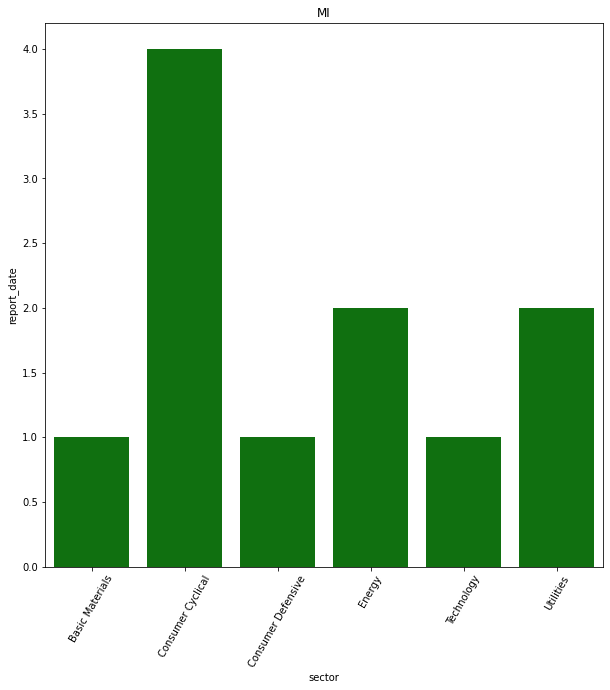

In [84]:
dat_index=indice.loc[:,e,:] 
dat_index_ordenado=dat_index.sort_values(by="per")
dat_index["accion"]=dat_index.index.get_level_values(1)+"_"+dat_index.index.get_level_values(2)
dat_index_ordenado["sector"]=dat_index["accion"].transform(lambda x:sectores[x])
dat_index_ordenado["nombre"]=dat_index["accion"].transform(lambda x:nombres[x])
plt.figure(figsize=(10,10))
cuenta=dat_index_ordenado.groupby("sector").count()
ax=sns.barplot(x=cuenta.index,y=cuenta.report_date,color="green") 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
plt.title(e)


In [85]:
dat_index_ordenado.columns

Index(['netIncome', 'totalAssets', 'totalLiab', 'totalCurrentLiabilities',
       'totalStockholderEquity', 'commonStockSharesOutstanding', 'netDebt',
       'freeCashFlow', 'totalRevenue', 'ebit', 'ebitda', 'adjusted_close',
       'per', 'earnings', 'report_date', 'earnings_per', 'prizebook',
       'solvenciaLargo', 'solvenciaCorto', 'liquidez', 'ex', 'sector',
       'nombre'],
      dtype='object')

In [94]:
dat_index_ordenado["marketCap"]=dat_index_ordenado.adjusted_close*dat_index_ordenado.commonStockSharesOutstanding
dat_index_ordenado.loc[:,["nombre","netIncome","totalRevenue","per","marketCap","totalAssets","sector"]]


nombre  \
fecha      exchange stock                                                      
2006-09-01 MI       ASR                                      A.S. Roma S.P.A   
                    IKG                                    Intek Group S.p.A   
                    CSP                CSP International Fashion Group S.p.A   
                    ENI                                            Eni S.p.A   
                    ERG                                            ERG S.p.A   
                    SRS                                          Saras S.p.A   
                    REY                                          Reply S.p.A   
                    TRN    Terna - Rete Elettrica Nazionale Società per A...   
                    DLG                                      De'Longhi S.p.A   
                    MARR                                          MARR S.p.A   
                    PIA                                     Piaggio & C. SpA   

                              netIncome  totalRevenue       per     marketCap  \
fecha      exchange stock                                                       
2006-09-01 MI       ASR    4.553300e+07  2.831200e+07   8.51898  3.878946e+08   
                    IKG    3.637379e+07  8.083742e+08  10.54769  3.836593e+08   
                    CSP    2.418474e+06  2.467877e+07  11.48330  2.777206e+07   
                    ENI    2.417595e+09  2.070470e+10  11.75900  2.842849e+10   
                    ERG    6.189446e+07  2.343524e+09  21.05363  1.303103e+09   
                    SRS    1.036909e+08  1.507787e+09  21.54476  2.233996e+09   
                    REY    6.648579e+06  5.238966e+07  24.69106  1.641605e+08   
                    TRN    9.411639e+07  3.159327e+08  25.56269  2.405868e+09   
                    DLG    1.430338e+07  3.221681e+08  28.11232  4.021011e+08   
                    MARR   8.242985e+06  2.550256e+08  28.71973  2.367363e+08   
                    PIA    2.655567e+07  4.316411e+08  28.82340  7.654249e+08   

                            totalAssets              sector  
fecha      exchange stock                                    
2006-09-01 MI       ASR    1.638810e+08   Consumer Cyclical  
                    IKG    1.210169e+10     Basic Materials  
                    CSP    1.140717e+08   Consumer Cyclical  
                    ENI    7.392885e+10              Energy  
                    ERG    3.928099e+09           Utilities  
                    SRS    2.837973e+09              Energy  
                    REY    1.215381e+08          Technology  
                    TRN    6.269308e+09           Utilities  
                    DLG    3.735491e+09   Consumer Cyclical  
                    MARR   5.705235e+08  Consumer Defensive  
                    PIA    1.524060e+09   Consumer Cyclical

In [91]:
stocks=np.unique(dat_index_ordenado.index.get_level_values(2))
stocks=iter(stocks)

In [92]:
stock=next(stocks)
descriptions[e+"_"+stock]

'A.S. Roma S.p.A., together with its subsidiary, operates a football club in Italy. The company operates a stadium; sells match tickets, and television and radio rights; sells AS Roma branded products through AS Roma stores; and licenses AS Roma branded products. It also engages in the sponsorship and advertising activities. The company was founded in 1927 and is based in Rome, Italy. A.S. Roma S.p.A. is a subsidiary of NEEP Roma Holding S.p.A.'

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
p_aux=precios.loc[:,stock,e,:].reset_index()
p_aux=p_aux.loc[p_aux.fecha<=fechaSig]
f_aux=datos.loc[:,e,stock,:].reset_index()
f_aux=f_aux.loc[f_aux.fecha<fechaSig]

In [96]:
f_aux.isna().sum(),f_aux.shape

(fecha                           0
 exchange                        0
 stock                           0
 netIncome                       0
 totalAssets                     0
 totalLiab                       0
 totalCurrentLiabilities         0
 totalStockholderEquity          0
 commonStockSharesOutstanding    0
 netDebt                         2
 freeCashFlow                    2
 totalRevenue                    0
 ebit                            2
 ebitda                          2
 adjusted_close                  0
 per                             0
 earnings                        2
 report_date                     0
 earnings_per                    2
 prizebook                       0
 solvenciaLargo                  0
 solvenciaCorto                  0
 liquidez                        2
 ex                              0
 dtype: int64,
 (2, 24))

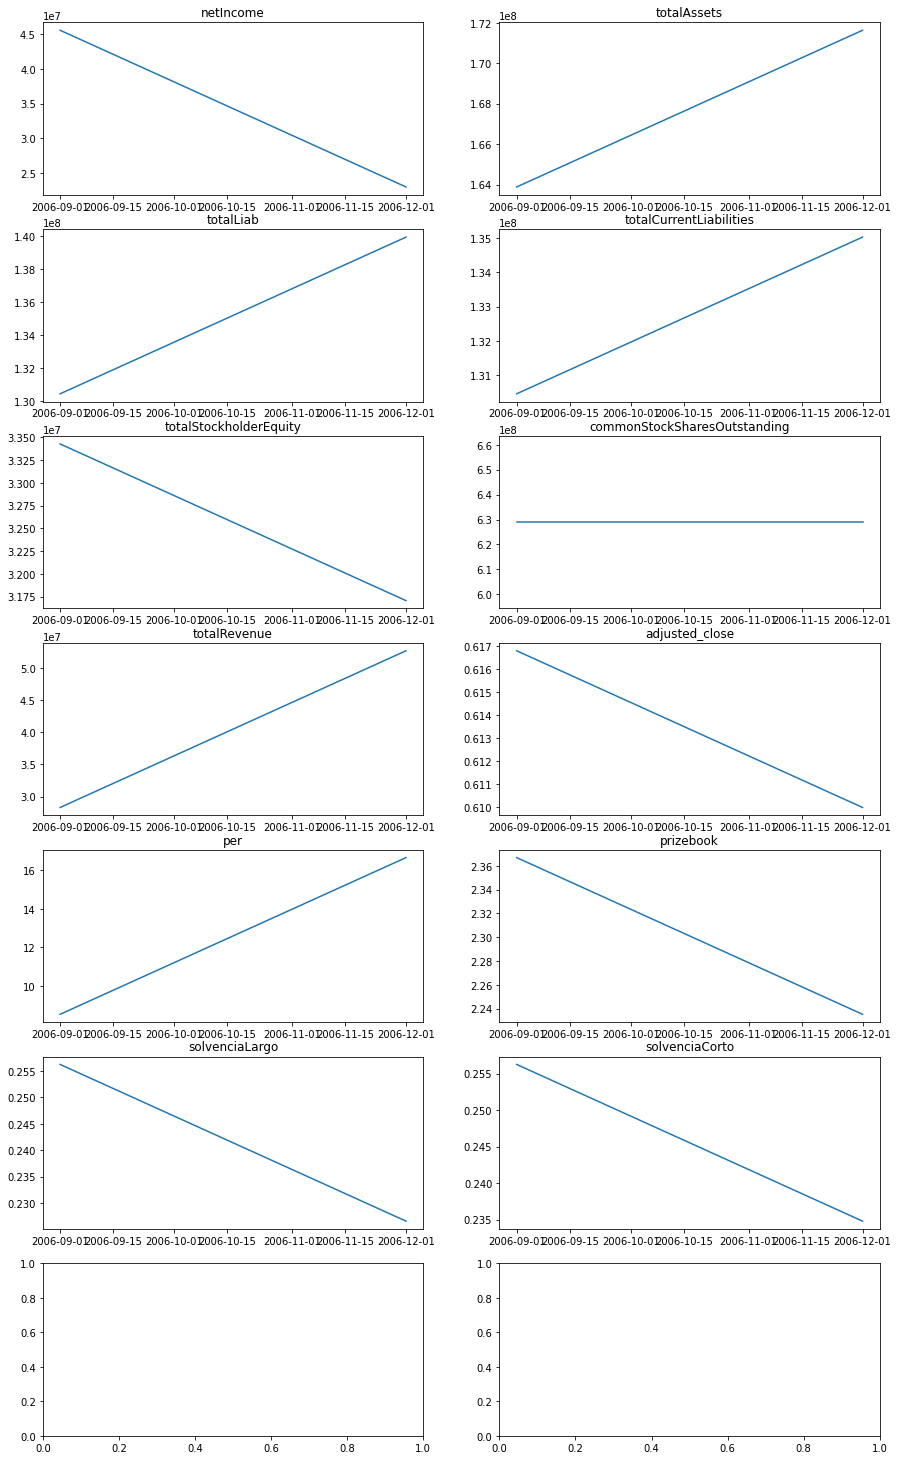

In [97]:
c=[]
for columna in f_aux.columns:
    if f_aux[columna].dtypes==float:
        if f_aux.isna().sum()[columna]<f_aux.shape[0]/2:
            c.append(columna)
figure,ax=plt.subplots(int(len(c)/2)+1,2,figsize=(15,26))
i=j=0
for u in c:
    ax[i,j].plot(f_aux["fecha"],f_aux[u])
    ax[i,j].title.set_text(u)
    j+=1
    if j==2:
        j=0
        i+=1
